# Documentação networkx

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality



In [1]:
import networkx as nx
import pandas as pd
from pyvis.network import Network
#import sqlalchemy
import ibm_db
import ibm_db_dbi

In [2]:
#conactando ao BigSql
#colocar credenciais
db = ibm_db.connect("DATABASE=BIGSQL;HOSTNAME=bigsql.pro.intra.rs.gov.br;PORT=32051;PROTOCOL=TCPIP;UID=XXXXXXXX;PWD=XXXXXXX;", "", "")
conn = ibm_db_dbi.Connection(db)   
#cur = conn.cursor()

In [3]:
# buscando os dados 
query = "select SRC,TGT,REL,WEIGHT from PROCERGS_MILENA_VILLAR.RELACIONAMENTO;"
df = pd.read_sql_query(query, conn)
g = nx.from_pandas_edgelist(df, 'SRC', 'TGT', edge_attr=True)


In [15]:
# criando o grafo não direcionado
G = nx.Graph(g)


In [16]:
#verificando os atributos das arestas
G.edges(1,data=True)

EdgeDataView([(1, 2, {'REL': 'marido', 'WEIGHT': 4}), (1, 3, {'REL': 'mãe', 'WEIGHT': 5}), (1, 4, {'REL': 'mãe', 'WEIGHT': 5}), (1, 16, {'REL': 'irmã', 'WEIGHT': 3}), (1, 14, {'REL': 'mãe', 'WEIGHT': 5}), (1, 15, {'REL': 'pai', 'WEIGHT': 5}), (1, 11, {'REL': 'cunhada', 'WEIGHT': 1}), (1, 10, {'REL': 'irmão', 'WEIGHT': 3}), (1, 5, {'REL': 'sogra', 'WEIGHT': 1})])

In [17]:
# plotar o grafo
nt = Network("400px", "900px", notebook = True)
nt.from_nx(G)
nt.show("grafo.html")

In [18]:
#buscando os labels dos nós(vértices)
query = "select * from PROCERGS_MILENA_VILLAR.PESSOAS;"
df_node = pd.read_sql_query(query, conn)

In [19]:
#transformando a tabela em um dicionário para atribuir labels aos IDs dos nós
nodelabel = df_node.set_index("ID").T.to_dict('records')[0]
# atribuindo o atributo label
nx.set_node_attributes(G, nodelabel, 'title')
G.nodes(data=True)

NodeDataView({2: {'size': 10, 'title': 'Eloi'}, 1: {'size': 10, 'title': 'Vivianne'}, 3: {'size': 10, 'title': 'Jade'}, 4: {'size': 10, 'title': 'Camila'}, 10: {'size': 10, 'title': 'Fabio'}, 16: {'size': 10, 'title': 'Virginia'}, 11: {'size': 10, 'title': 'Elis'}, 12: {'size': 10, 'title': 'Felipe'}, 13: {'size': 10, 'title': 'Brenda'}, 15: {'size': 10, 'title': 'Ney'}, 14: {'size': 10, 'title': 'Maria'}, 17: {'size': 10, 'title': 'Joaquim'}, 18: {'size': 10, 'title': 'Marisa'}, 7: {'size': 10, 'title': 'Inês'}, 19: {'size': 10, 'title': 'Maiara'}, 20: {'size': 10, 'title': 'Ligia'}, 8: {'size': 10, 'title': 'Barbara'}, 6: {'size': 10, 'title': 'Ricardo'}, 5: {'size': 10, 'title': 'Eduardo'}, 9: {'size': 10, 'title': 'Carolina'}})

## Algoritmo Betweenness
 Mede o número de caminhos mais curtos em que o nó se encontra. Essa centralidade costuma ser usada para determinar o fluxo de informações no gráfico. Quanto maior o número, mais informações fluem por ele.
Evidencia o vértice que serve como "ponte" entre os demais.
Não implementado para grafos multidirecionais.

In [20]:
for k, v in sorted(nx.betweenness_centrality(G, weight = 'WEIGHT').items(), reverse= True, key=lambda x: x[1]):
    print(k, ':', v)

5 : 0.50682261208577
4 : 0.25925925925925924
6 : 0.24853801169590642
1 : 0.2378167641325536
3 : 0.23684210526315788
2 : 0.1783625730994152
11 : 0.14717348927875243
16 : 0.11793372319688109
12 : 0.0594541910331384
13 : 0.0594541910331384
15 : 0.0009746588693957114
14 : 0.0009746588693957114
10 : 0.0
17 : 0.0
18 : 0.0
7 : 0.0
19 : 0.0
20 : 0.0
8 : 0.0
9 : 0.0


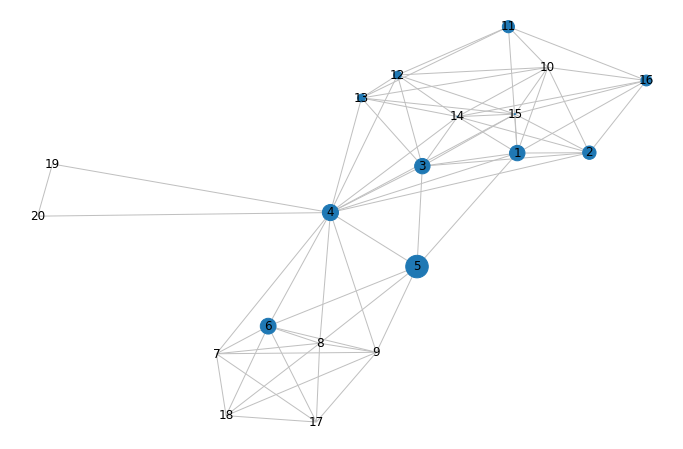

In [22]:
# plotando conforme o grau de proximidade (closeness)
import matplotlib.pyplot as plt
bc = nx.betweenness_centrality(G, weight = 'WEIGHT')
plt.figure(1, figsize=(12, 8))
plt.axis('off')
nx.draw_networkx(G, node_size=[v * 1000 for v in bc.values()], edge_color='silver')